In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# IMPORTING DATA 

df = pd.read_csv('Walmart DataSet.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
# DATA SUMMARY

df.info()

# INSIGHTS

# Data has 8 columns
# Two integer columns and rest are all float 
# Date column is in object format and needs to be converted into date time
# The holiday week column is already label encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.shape

# Data has 6435 rows and 8 columns

(6435, 8)

In [5]:
# CONVERTING THE DATE COLUMN IN DATE TIME

df['Date']= pd.to_datetime(df['Date'], dayfirst = True)

# dayfirst indicates that the first part of the date is the date

In [6]:
# SUCCESSFULLY CONVERTING THE object COLUMN TYPE into DATE FORMATCharulatha

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
#  NUMERICAL DATA DESCRIPTION OF DATA

df.describe().T


# INSIGHTS

# There are 45 stores in the data
# The weekly sales of all stores average at 1046965
# There were 450 holiday weeks across stores and 5985 non holiday weeks
# So averaging out number of stores as 45, there were 10 holiday weeks and 133 non holiday weeks
# The dates are from 2010 Jan to 10 Dec 2012, so around 2 years of data has been captured
# Fuel price averages around 3.35 and hits a max of 4.46
# CPI ranges from 126 to 227 across stores and time


,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


# DATA CLEANING

In [8]:

# NULL VALUES

df.isnull().sum()

# INSIGHTS

# There are no null values across any features

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
# CHECKING FOR ANY SPEICAL CHARACTERS OR UNIQUE VALUES

for unique in df.columns:
    unique_values = df[unique].unique()
    print(f'Unique values for {unique}: {unique_values}')
    
    
# Does not look like any unique values exist in any of these columns

Unique values for Store: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Unique values for Date: ['2010-02-05T00:00:00.000000000' '2010-02-12T00:00:00.000000000'
 '2010-02-19T00:00:00.000000000' '2010-02-26T00:00:00.000000000'
 '2010-03-05T00:00:00.000000000' '2010-03-12T00:00:00.000000000'
 '2010-03-19T00:00:00.000000000' '2010-03-26T00:00:00.000000000'
 '2010-04-02T00:00:00.000000000' '2010-04-09T00:00:00.000000000'
 '2010-04-16T00:00:00.000000000' '2010-04-23T00:00:00.000000000'
 '2010-04-30T00:00:00.000000000' '2010-05-07T00:00:00.000000000'
 '2010-05-14T00:00:00.000000000' '2010-05-21T00:00:00.000000000'
 '2010-05-28T00:00:00.000000000' '2010-06-04T00:00:00.000000000'
 '2010-06-11T00:00:00.000000000' '2010-06-18T00:00:00.000000000'
 '2010-06-25T00:00:00.000000000' '2010-07-02T00:00:00.000000000'
 '2010-07-09T00:00:00.000000000' '2010-07-16T00:00:00.000000000'
 '2010-07-23T00:00:00.000000000' 

# DUPLICATE DATA

In [10]:
df.duplicated().sum()

0

In [11]:
# There are no duplicates in the data set so its pretty clean data

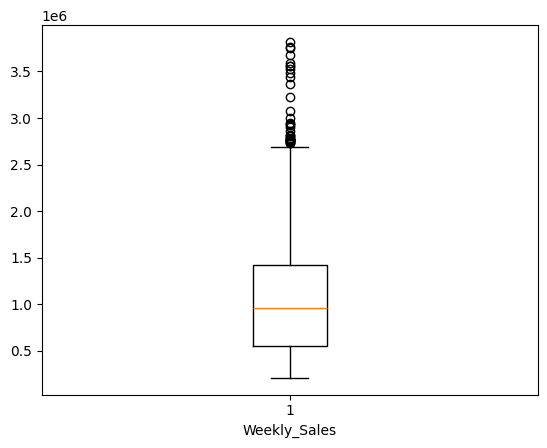

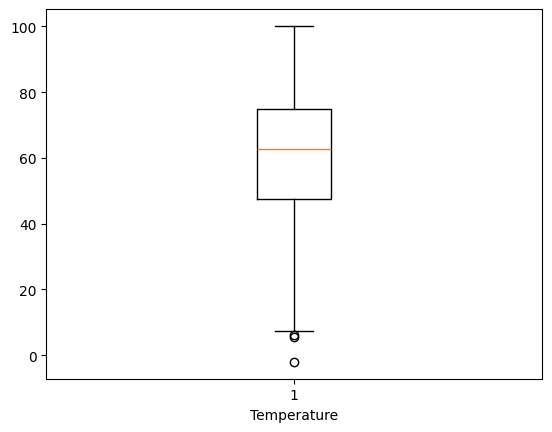

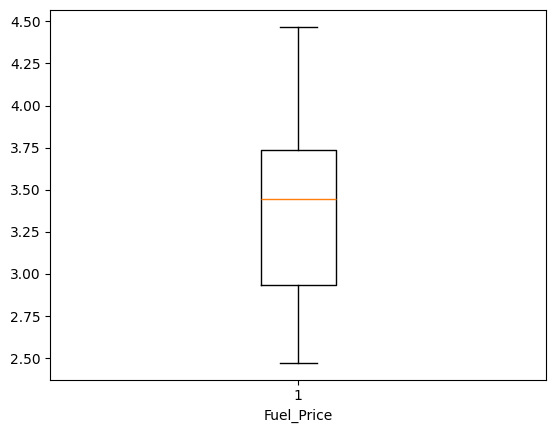

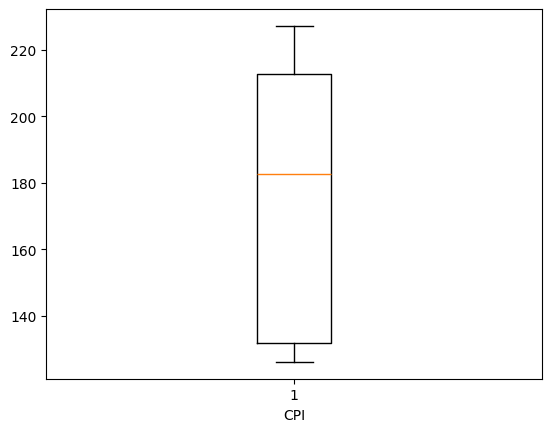

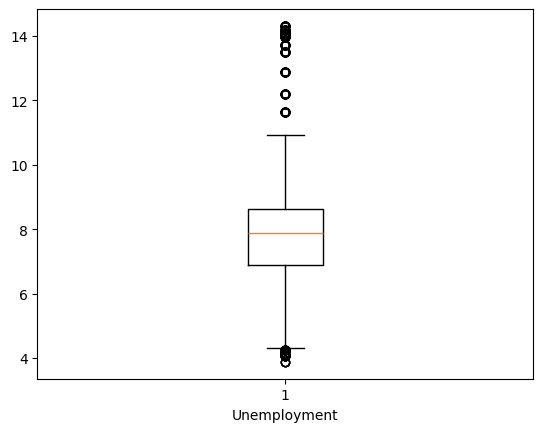

In [12]:
# CHECKING FOR OUTLIERS

cols = ['Weekly_Sales','Temperature', 'Fuel_Price' ,'CPI', 'Unemployment']

for i in cols:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()
    
# The weekly sales and unemployment column has some outliers but will be igorning them for now and will not remove 
# them as we have not checked for feature importance

In [13]:
# FEATURE CORRELATION

# Checking for feature correlation with heatmaps

df.corr(numeric_only = True)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.735625e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.735625e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


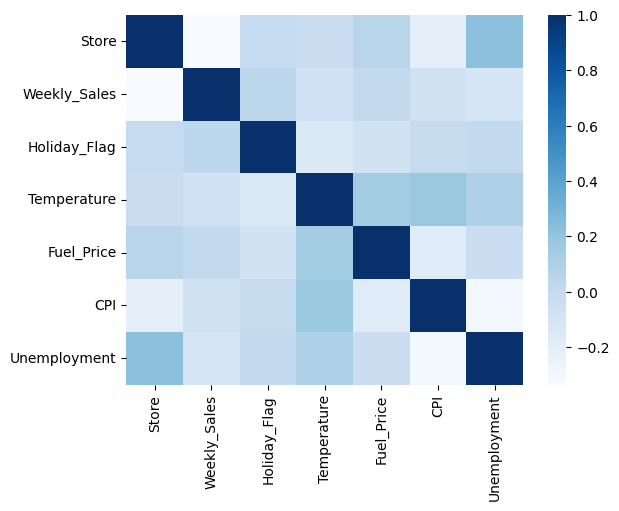

In [14]:
# Plotting the heatmap 

sns.heatmap(df.corr(numeric_only = True), cmap = 'Blues')
plt.show()

# No numeric feature shows any direct correlation with weekly sales
# Need to evaluate the features via visualisation 

In [15]:
# FEATURE ENGINEERING

# Extracting the date, month and year from the date column

df['Day'] = df["Date"].dt.day
df['Month'] = df["Date"].dt.month
df['Year'] = df["Date"].dt.year


In [16]:
# Changing the Months value from numbers to actual names

import calendar

df['Month_value'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [17]:
# CREATING A WEEK COLUMN FOR ANALYSIS 

df['Week'] = df.Date.dt.isocalendar().week 

In [18]:
# Checking for successful feature engineering and transformation

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Month_value,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,Feb,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,Feb,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,Feb,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,Feb,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,Mar,9


In [19]:
# VISUALISING WEEKLY SALES

Weekly_sales = df.groupby(['Week'])['Weekly_Sales'].sum()
Weekly_sales = pd.DataFrame(Weekly_sales)
Weekly_sales.reset_index(inplace = True)

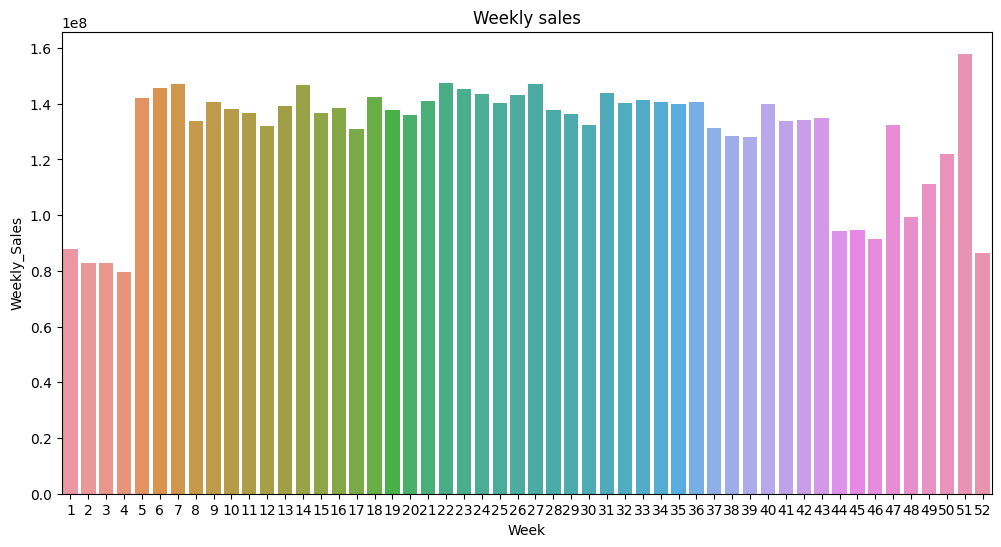

In [20]:
plt.figure(figsize = (12,6))
sns.barplot(x= 'Week', y='Weekly_Sales', data= Weekly_sales)
plt.title('Weekly sales')
plt.show()

In [21]:
# INSIGHTS

# # 1. It does show seasonal data where sales are consistently low in certain weeks and consistently average in certains
# # weeks
# 2. This would make more sense if we can tease out per store data and check for any correlations as different features
# # might affect the sales of different stores


# STORE WISE COMPARISON OF SALES

In [22]:
Store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

Store_sales=Store_sales.sort_values(by = 'Weekly_Sales', ascending = False)
Store_sales

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


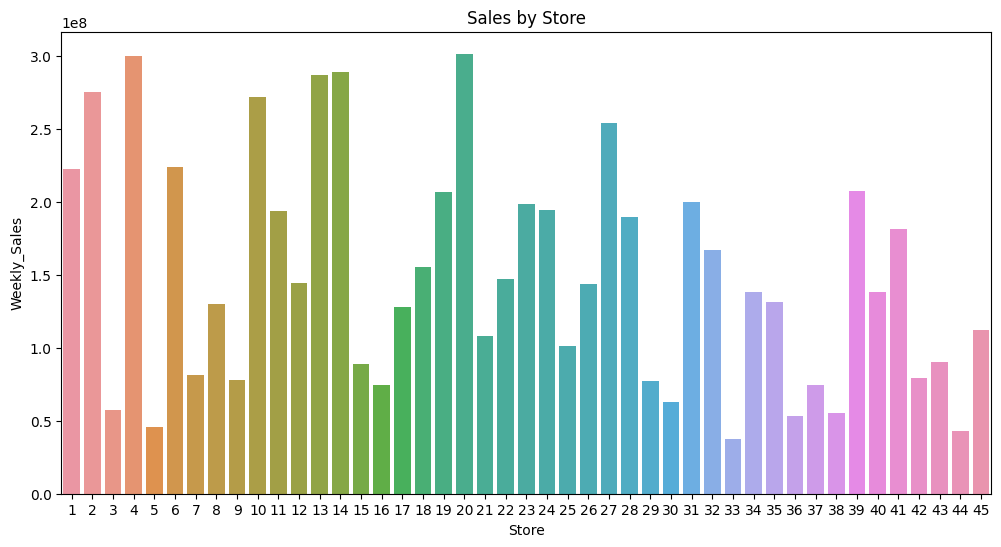

In [23]:
plt.figure(figsize = (12,6))
sns.barplot(x= 'Store', y='Weekly_Sales', data= Store_sales)
plt.title('Sales by Store')
plt.show()

In [24]:
# # INSIGHTS
# 1. STORE 20 ranks first in sales followed by store 4, 14, 13 and 2
# 2. Store 38,36, 5, 44 and 33 rank in last 5

In [25]:
# If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most? 

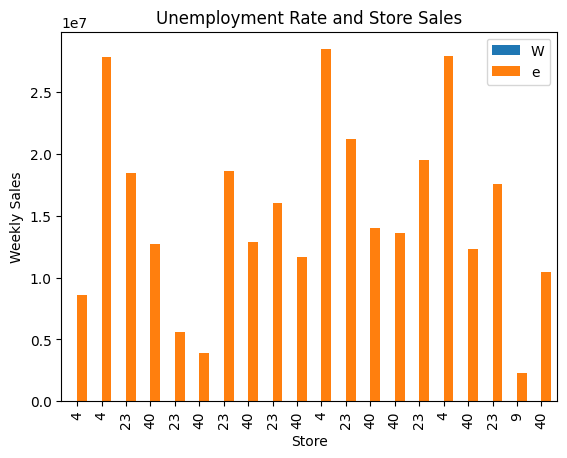

In [26]:
Unemployment_sales = df.groupby(['Store','Unemployment'])['Weekly_Sales'].sum().reset_index()

# 20 STORES WITH LOW UNEMPLOYMENT INDEX

Unemployment_sales=Unemployment_sales.sort_values(by = 'Unemployment', ascending = True)

Unemployment_sales = Unemployment_sales.set_index('Store')
Unemployment_sales.head(20).plot(kind = 'bar', width = 0.8)
plt.ylabel('Weekly Sales')
plt.title("Unemployment Rate and Store Sales")
plt.legend('Weekly Sales')
plt.show()

In [27]:
Unemp_store = pd.DataFrame(df.groupby(['Store'])['Unemployment'].sum().sort_values(ascending = True))
Unemp_store

# Store 23, 40, 4, 8 and 9  has an overall low unemplyment index

,Unemployment
Store,
23,685.830
40,685.830
4,852.951
8,871.134
9,872.283
5,900.243
16,926.353
17,936.565
6,944.787


In [28]:
# INSIGHTS

# Store 23, 40, 4, 8 and 9  has an overall low unemplyment index and they are ranking multiple times in top 20 
# but do have an overall high sales when compared to ones in the bottom 20

# Unemployment rate when low generally has high sales when compared to the high unemployment index

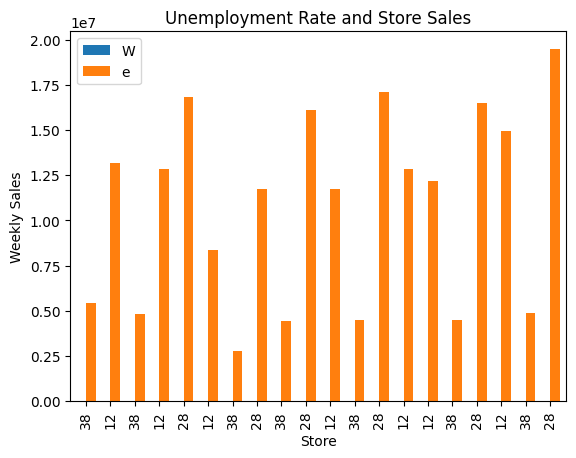

In [29]:

# 20 STORES WITH HIGH UNEMPLOYMENT INDEX

Unemployment_sales.tail(20).plot(kind = 'bar', width = 0.8)
plt.ylabel('Weekly Sales')
plt.title("Unemployment Rate and Store Sales")
plt.legend('Weekly Sales')
plt.show()

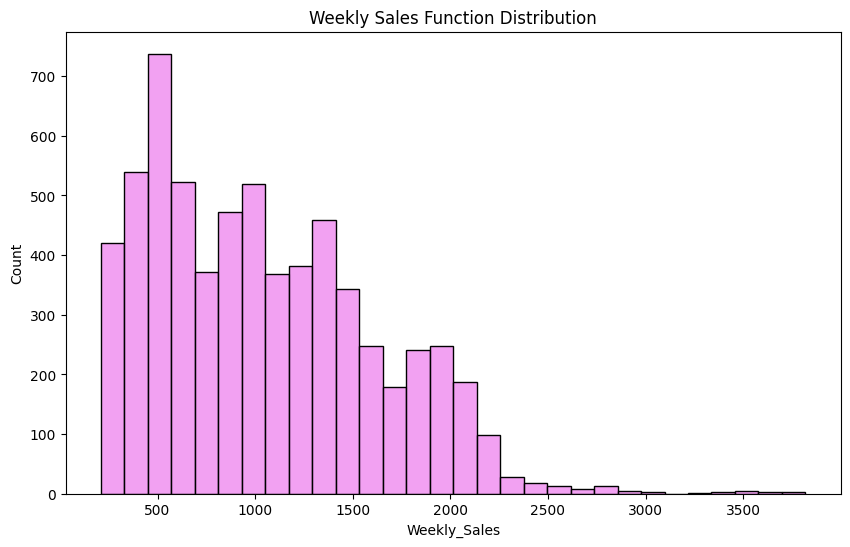

In [30]:

# Visualising the kernel density distribution of weekly sales

plt.figure(figsize=(10, 6))
df["Weekly_Sales"]=df.Weekly_Sales/1000
sns.histplot(df.Weekly_Sales, kde=False, bins=30, color = 'violet')
plt.title('Weekly Sales Function Distribution')
plt.show()

In [31]:
df["Weekly_Sales"]=df.Weekly_Sales*1000

In [32]:
# Visualising the distribution of each column against weekly sales using a function

def scatterplot(data, column):
    plt.figure()
    plt.scatter(data[column] , data['Weekly_Sales'], color = 'salmon')
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)

# SALES VS FEATURES COMPARSION

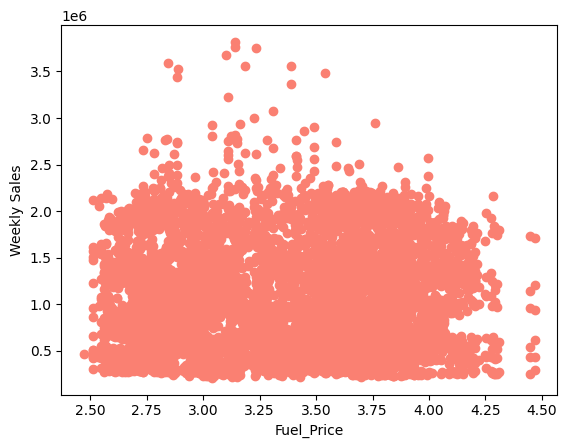

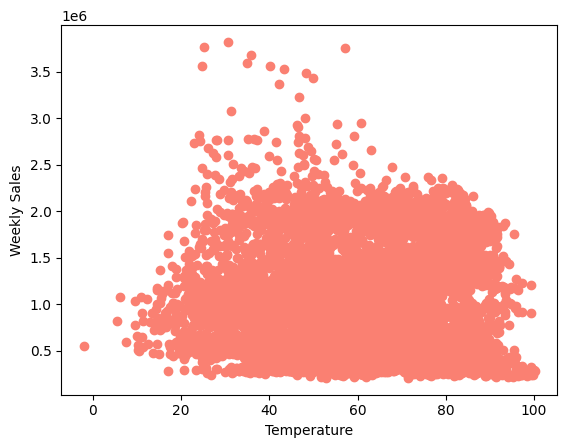

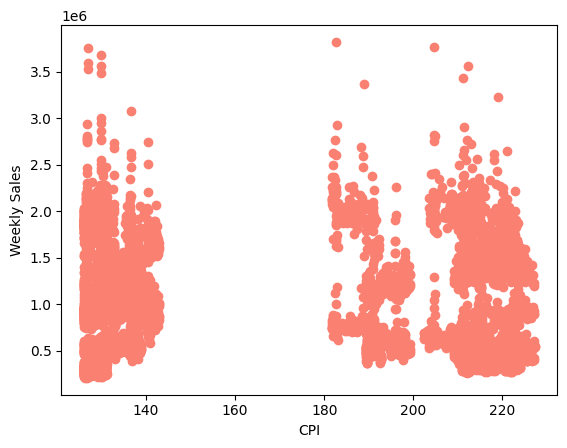

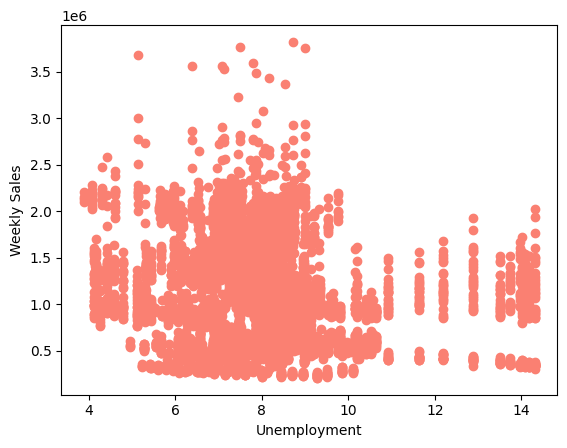

In [33]:
scatterplot(df, 'Fuel_Price')
scatterplot(df, 'Temperature')
scatterplot(df, 'CPI')
scatterplot(df, 'Unemployment')



In [34]:
# FUEL PRICE

# The higher the fuel price the lower the sales are 
# Most of the sales are between the range of 2.6 to 4 
# The weekly sales average at 2e9 for the above fuel price range
# Fuel price definitely has an impact on sales 


In [35]:
# TEMPERATURE

# Sales are low at both extreme temperatures
# They are most dense between 40-80F
# In store Sales is definitely higher when the tempearatures are more ambient

In [36]:
# # UNEMPLOYMENT

# The sales are lowest at higher unemplpyment indices and averages at 6-10 
# The sales are considerably low below 6 an above 10 unemployment indices

In [87]:
# CPI

# The consumer price index does not show much difference in sales 
# It does not make a huge contribution to changes in weekly sales

# Visualising weekly sales with Holiday Flag, Month and Store wise comparison

In [37]:
def barplot(data, column):
    plt.figure(figsize = (10,9))
    sns.barplot(x = data[column], y = data['Weekly_Sales'], data = data)
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)

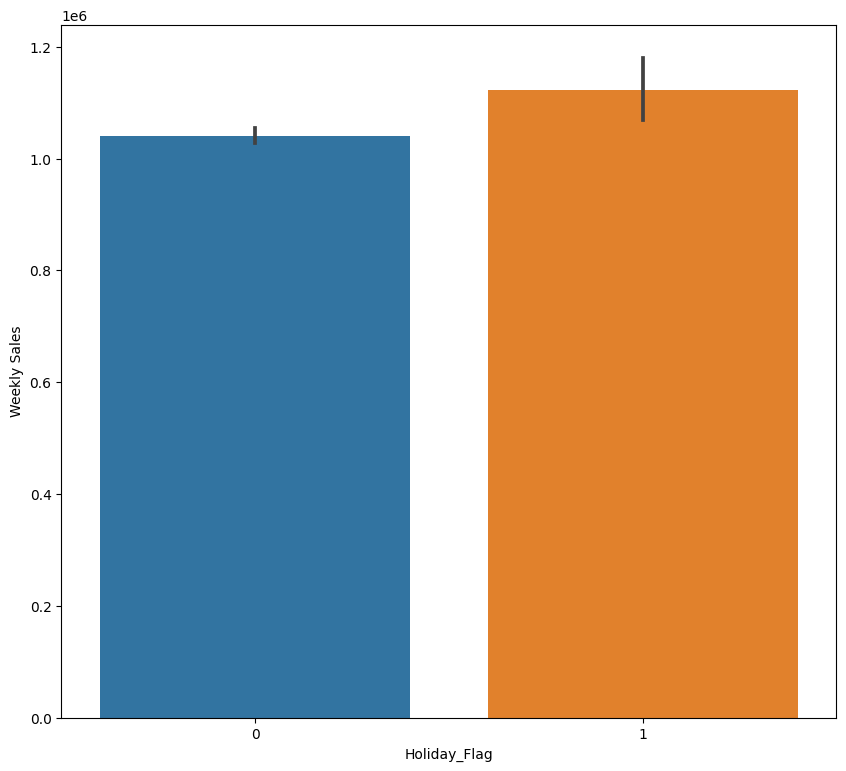

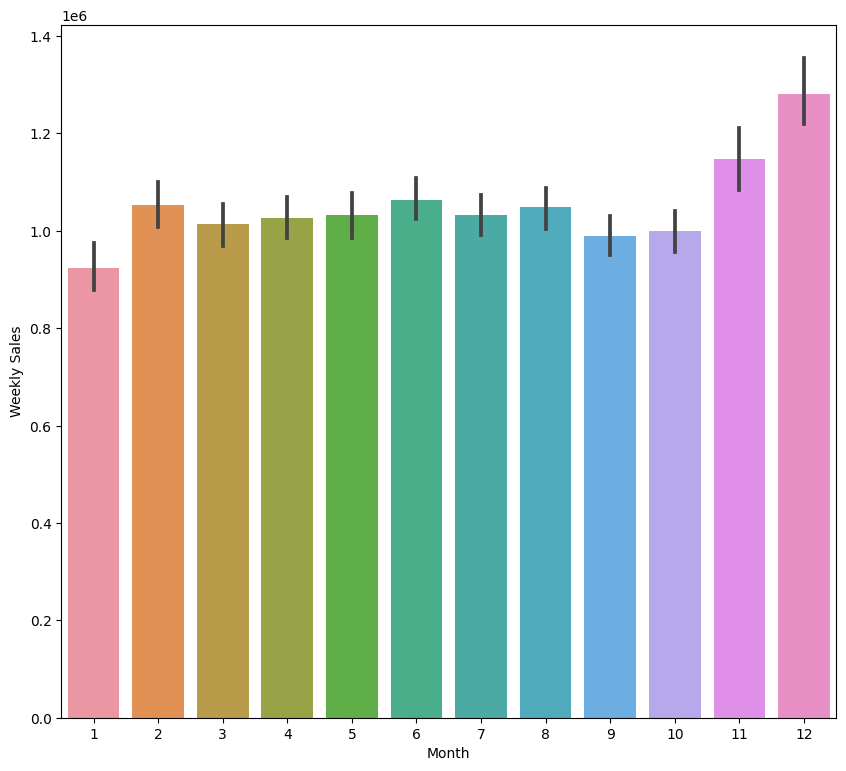

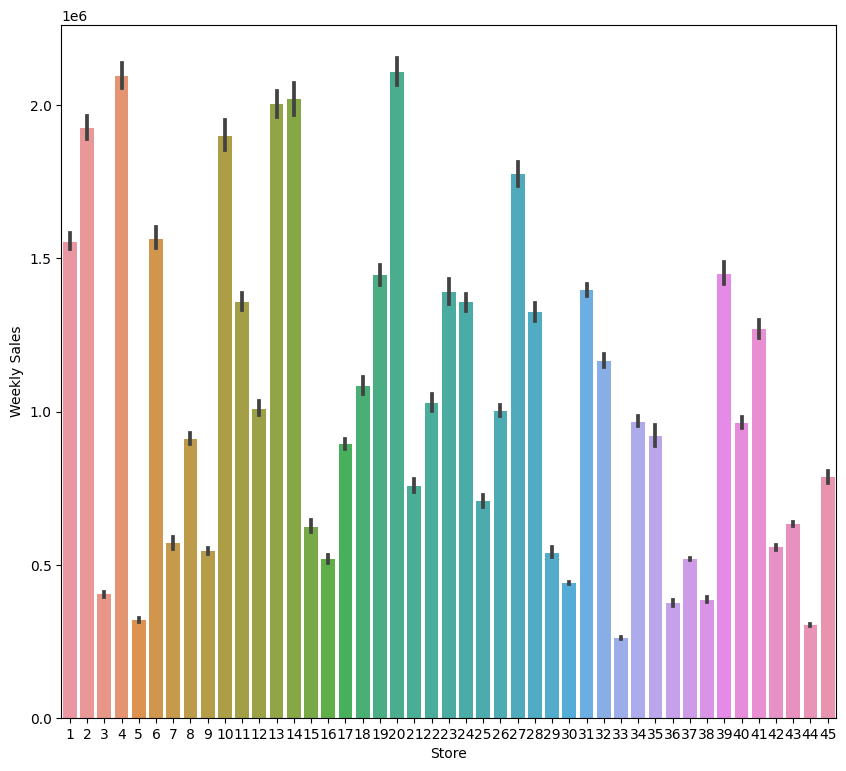

In [38]:

barplot(df, 'Holiday_Flag')
barplot(df, 'Month')
barplot(df, 'Store')


In [39]:
# INSIGHTS

# Sales are comparbly low in holiday weeks when compared to non holiday weeks
# Sales are highest in the festive season on November and December and records lowest in january
# Sales average at 1e9 for the rest of the months


# b. If the weekly sales show a seasonal trend, when and what could be the reason?

# YEAR WISE COMPARISON OF SALES

In [40]:
# This dataset has data from three years 2010, 2011,2012

df['Year'].value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

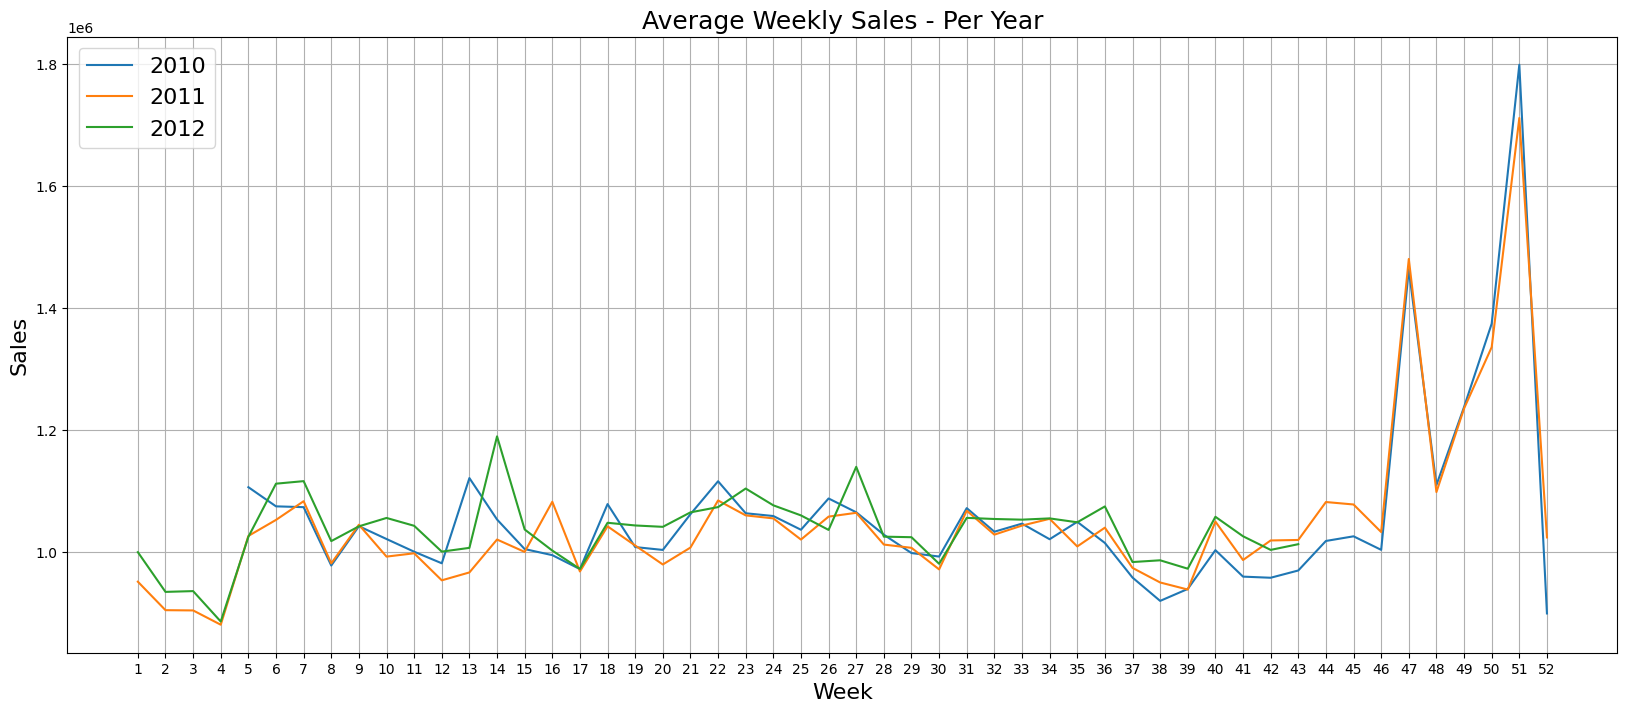

In [41]:
weekly_sale_2010 = df[df.Year==2010]['Weekly_Sales'].groupby(df['Week']).mean()
weekly_sale_2011 = df[df.Year==2011]['Weekly_Sales'].groupby(df['Week']).mean()
weekly_sale_2012 = df[df.Year==2012]['Weekly_Sales'].groupby(df['Week']).mean()
plt.figure(figsize=(20,8))
weekly_sale_2010.plot()
weekly_sale_2011.plot()
weekly_sale_2012.plot()
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

In [42]:
# The sales are highest november and december
# Also peak during easter in April
# Sales are always the lowest in January and again is low in August and September during school holidays

# DATE WISE COMPARISON OF SALES

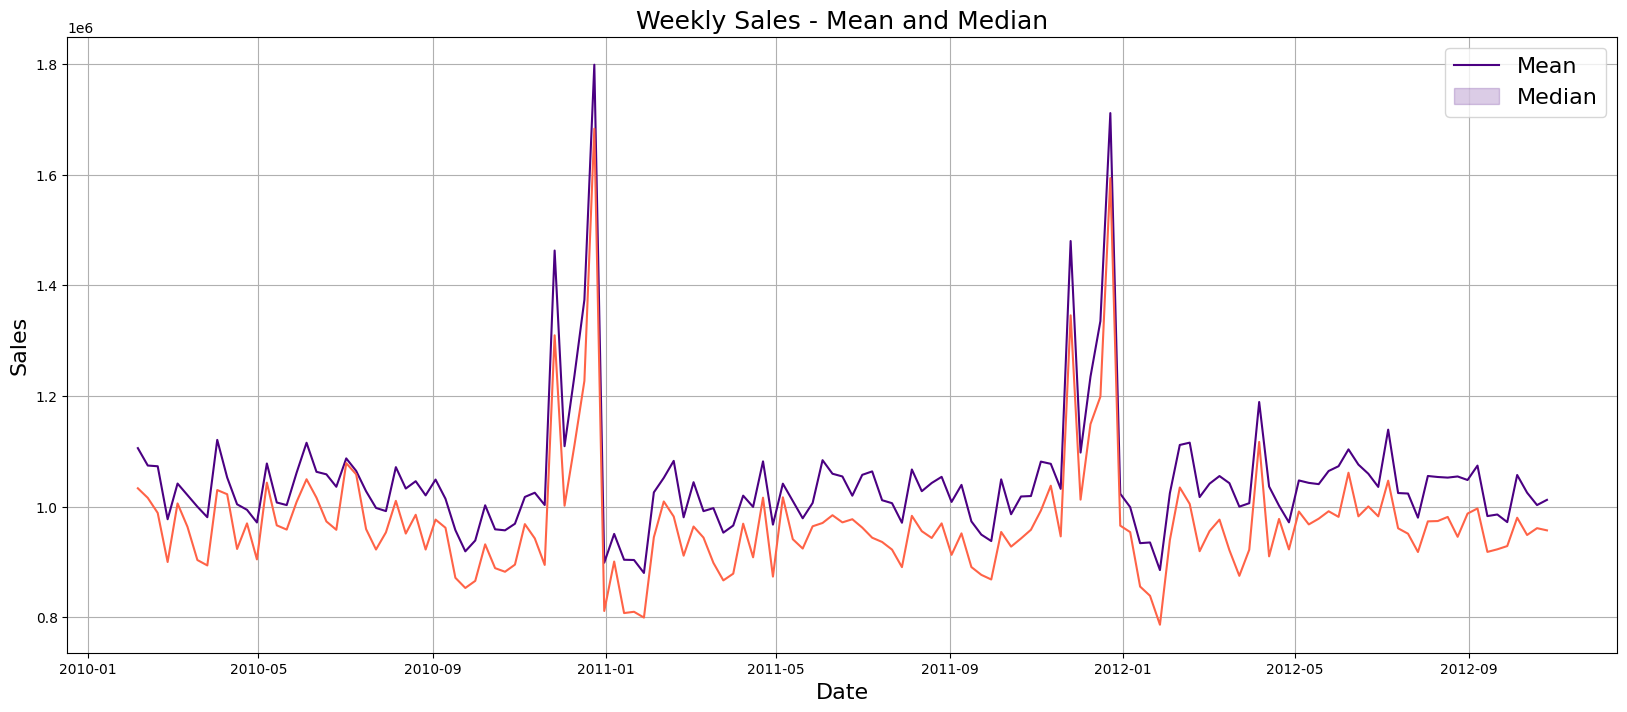

In [43]:
weekly_sales_mean = df['Weekly_Sales'].groupby(df['Date']).mean()
weekly_sales_median = df['Weekly_Sales'].groupby(df['Date']).median()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_mean, color = 'indigo')
sns.lineplot(weekly_sales_median, color = 'tomato')
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Sales - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

In [44]:
# TIME SERIES ANALYSIS

In [45]:
# CREATING A COPY OF THE DATAFRAME FOR ANALYSIS

df1 = pd.read_csv('Walmart DataSet.csv')
df1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [46]:
# TIME SERIES ANALYSIS FOR STORE 20

In [47]:

df1.set_index('Date', inplace = True)
df1

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,64.88,3.997,192.013558,8.684
05-10-2012,45,733455.07,0,64.89,3.985,192.170412,8.667
12-10-2012,45,734464.36,0,54.47,4.000,192.327265,8.667


# TIME SERIES ANALYSIS FOR STORE 20

In [48]:
# EXTRACTING STORE 20
store20 = df1[df1.Store == 20]

In [49]:
# Grouping data date wise and summing up sales

store20sales = pd.DataFrame(store20.groupby('Date')['Weekly_Sales'].sum())

store20sales

,Weekly_Sales
Date,
01-04-2011,1927993.09
01-06-2012,2143126.59
01-07-2011,2053165.41
01-10-2010,1933719.21
02-03-2012,2148822.76
...,...
30-07-2010,1955896.59
30-09-2011,1945808.26
30-12-2011,2043245.00


In [50]:
# CONVERTING THE INDEX TO DATETIME FORMAT

store20sales.index = pd.to_datetime(store20sales.index)

/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_58488/98105016.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  store20sales.index = pd.to_datetime(store20sales.index)


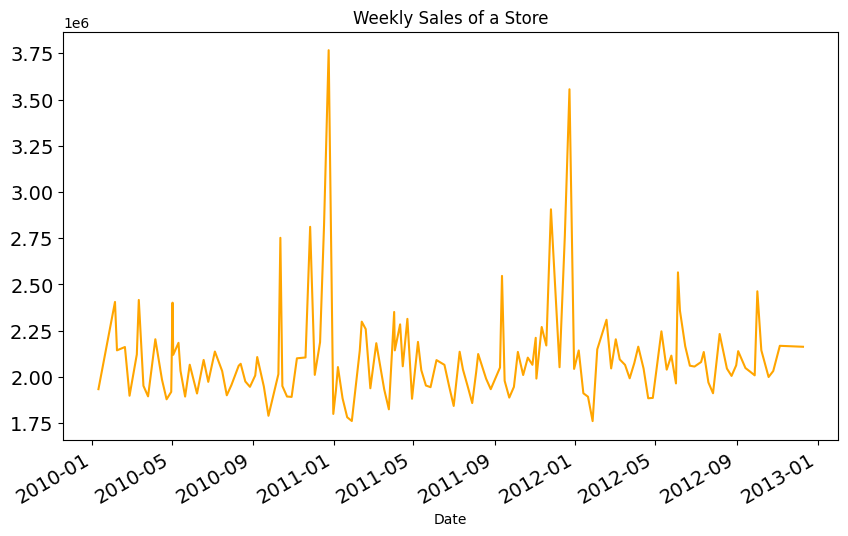

In [51]:
# Plotting weekly sales to see the trend and sesonality

store20sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'orange')
plt.show()

In [52]:
from prophet import Prophet

In [53]:
store20sales

,Weekly_Sales
Date,
2011-01-04,1927993.09
2012-01-06,2143126.59
2011-01-07,2053165.41
2010-01-10,1933719.21
2012-02-03,2148822.76
...,...
2010-07-30,1955896.59
2011-09-30,1945808.26
2011-12-30,2043245.00


In [54]:
# RESETTING INDEX TO RENAME COLUMNS

store20sales.reset_index(inplace = True)


In [55]:
# RENAMING COLUMNS FOR FBPROPHET
store20sales = store20sales.rename(columns = {'Date': 'ds', 'Weekly_Sales':'y'})

In [56]:
# CREATING OBJECT FOR THE MODEL

con_model=Prophet(interval_width=0.95)

In [57]:
# Training of Model (fiting thr data to the model)
con_model.fit(store20sales)

13:05:36 - cmdstanpy - INFO - Chain [1] start processing
13:05:36 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
future=con_model.make_future_dataframe(periods=400)

In [59]:
future

,ds
0,2010-01-10
1,2010-02-04
2,2010-02-07
3,2010-02-19
4,2010-02-26
...,...
538,2014-01-10
539,2014-01-11
540,2014-01-12
541,2014-01-13


In [60]:
# forecasting future sales yhat with confidence intervals

forecast=con_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
536,2014-01-08,2.042181e+06,1.622350e+06,2.414405e+06
537,2014-01-09,1.977122e+06,1.588798e+06,2.395228e+06
538,2014-01-10,1.884072e+06,1.478644e+06,2.276072e+06
539,2014-01-11,1.822160e+06,1.433435e+06,2.237723e+06
540,2014-01-12,1.950354e+06,1.549142e+06,2.360627e+06
541,2014-01-13,1.910545e+06,1.516308e+06,2.340222e+06
542,2014-01-14,1.872291e+06,1.460812e+06,2.250574e+06


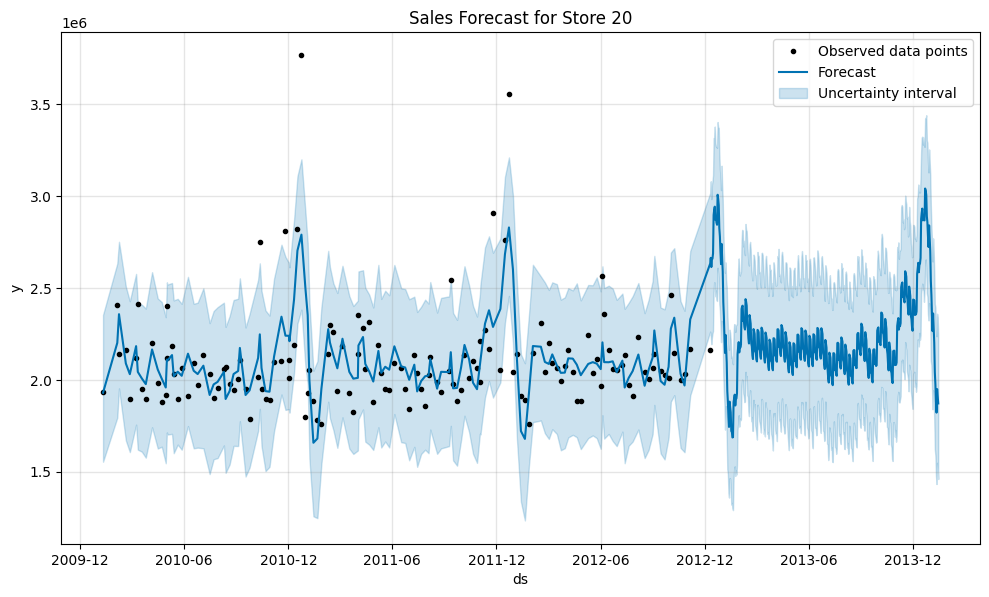

In [88]:
# PLOTTING DATA TO VISUALISE THE FORECAST

confirmed_plot=con_model.plot(forecast)
plt.title('Sales Forecast for Store 20')
plt.legend()
plt.show()

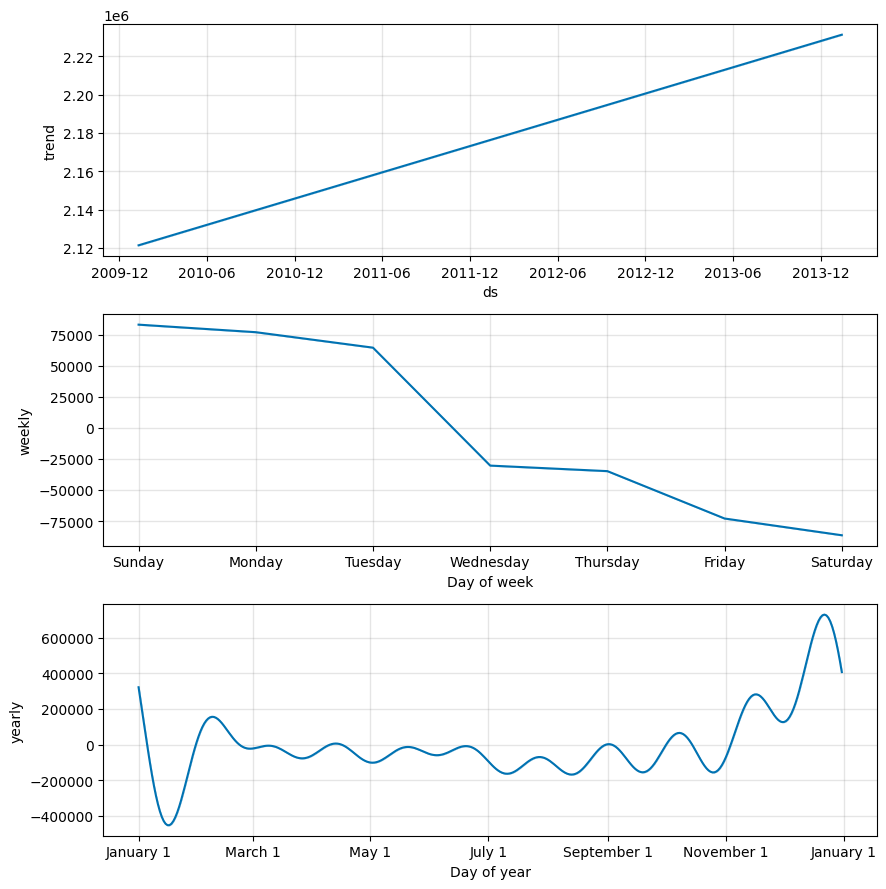

In [62]:
fig2 = con_model.plot_components(forecast)



  0%|          | 0/66 [00:00<?, ?it/s]

17:39:06 - cmdstanpy - INFO - Chain [1] start processing
17:39:06 - cmdstanpy - INFO - Chain [1] done processing
17:39:06 - cmdstanpy - INFO - Chain [1] start processing
17:39:07 - cmdstanpy - INFO - Chain [1] done processing
17:39:07 - cmdstanpy - INFO - Chain [1] start processing
17:39:07 - cmdstanpy - INFO - Chain [1] done processing
17:39:07 - cmdstanpy - INFO - Chain [1] start processing
17:39:07 - cmdstanpy - INFO - Chain [1] done processing
17:39:07 - cmdstanpy - INFO - Chain [1] start processing
17:39:07 - cmdstanpy - INFO - Chain [1] done processing
17:39:07 - cmdstanpy - INFO - Chain [1] start processing
17:39:07 - cmdstanpy - INFO - Chain [1] done processing
17:39:07 - cmdstanpy - INFO - Chain [1] start processing
17:39:07 - cmdstanpy - INFO - Chain [1] done processing
17:39:07 - cmdstanpy - INFO - Chain [1] start processing
17:39:07 - cmdstanpy - INFO - Chain [1] done processing
17:39:07 - cmdstanpy - INFO - Chain [1] start processing
17:39:07 - cmdstanpy - INFO - Chain [1]

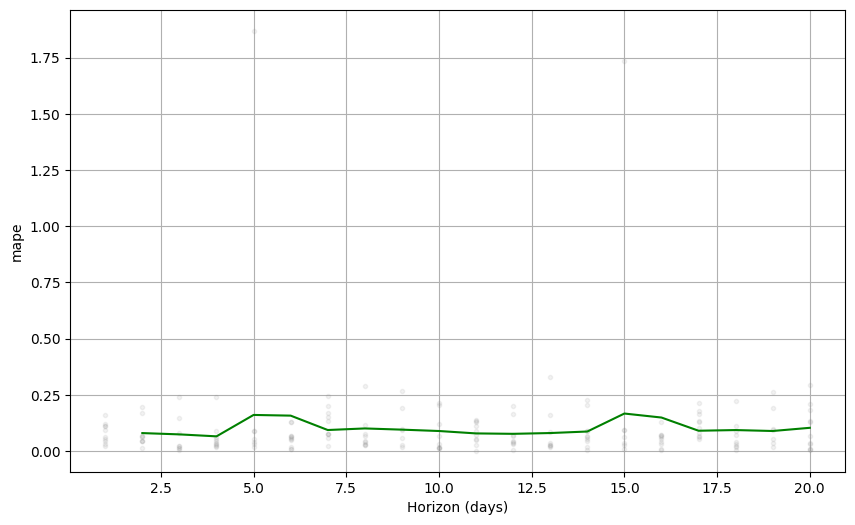

In [130]:
df_cv20 = cross_validation(con_model, horizon = '20 days')
df_p20 = performance_metrics(df_cv20)

fig = plot_cross_validation_metric(df_cv20, metric='mape', color = 'green')

In [131]:
df_p20.head(2)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,5.615270e+10,236965.606681,179335.044241,0.079434,0.061167,0.079169,0.944444
1,3 days,5.643788e+10,237566.581603,161975.867623,0.073654,0.044587,0.072716,0.888889


# TIME SERIES ANALYSIS FOR STORE 4

In [63]:
# EXTRACTING STORE 4
store4 = df1[df1.Store == 4]

# Grouping data date wise and summing up sales
store4sales = pd.DataFrame(store4.groupby('Date')['Weekly_Sales'].sum())

# CONVERTING THE INDEX TO DATETIME FORMAT

store4sales.index = pd.to_datetime(store4sales.index)


/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_58488/2517862072.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  store4sales.index = pd.to_datetime(store4sales.index)


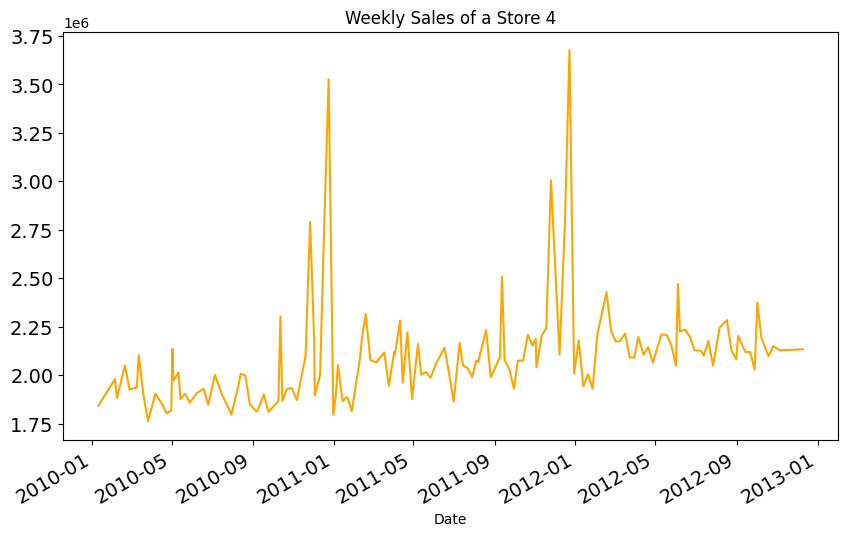

In [64]:
# Plotting weekly sales to see the trend and sesonality

store4sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store 4', fontsize=14, color = 'orange')
plt.show()

In [65]:
# RESETTING INDEX TO RENAME COLUMNS

store4sales.reset_index(inplace = True)


In [66]:
# RENAMING COLUMNS FOR FBPROPHET
store4sales = store4sales.rename(columns = {'Date': 'ds', 'Weekly_Sales':'y'})

In [67]:
# CREATING OBJECT FOR THE MODEL

con_model4=Prophet(interval_width=0.95)

In [68]:
# Training of Model (fiting thr data to the model)
con_model4.fit(store4sales)

13:05:37 - cmdstanpy - INFO - Chain [1] start processing
13:05:37 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
# CREATING FUTURE DATAFRAME FOR FORECASTING

future4=con_model4.make_future_dataframe(periods=400)

In [70]:
future4

,ds
0,2010-01-10
1,2010-02-04
2,2010-02-07
3,2010-02-19
4,2010-02-26
...,...
538,2014-01-10
539,2014-01-11
540,2014-01-12
541,2014-01-13


In [71]:
forecast4=con_model4.predict(future)
forecast4[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
536,2014-01-08,2.146009e+06,1.779782e+06,2.499784e+06
537,2014-01-09,2.074545e+06,1.720239e+06,2.424035e+06
538,2014-01-10,2.075985e+06,1.699545e+06,2.464082e+06
539,2014-01-11,1.880879e+06,1.527639e+06,2.253041e+06
540,2014-01-12,2.058071e+06,1.683730e+06,2.472451e+06
541,2014-01-13,2.029973e+06,1.663820e+06,2.382959e+06
542,2014-01-14,1.952853e+06,1.571640e+06,2.306421e+06


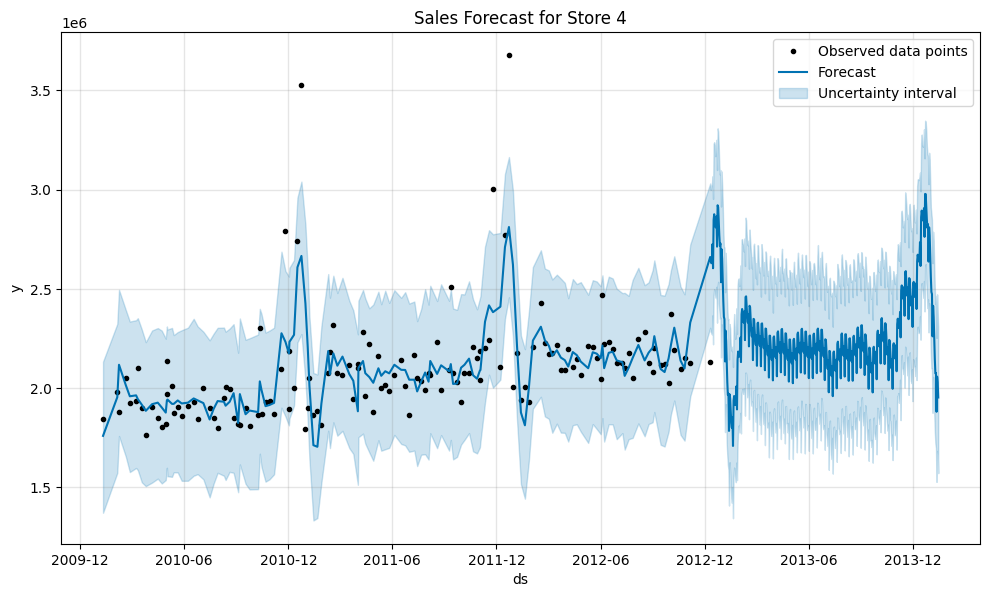

In [72]:
# PLOTTING DATA TO VISUALISE THE FORECAST

confirmed_plot4=con_model4.plot(forecast4)
plt.title('Sales Forecast for Store 4')
plt.legend()

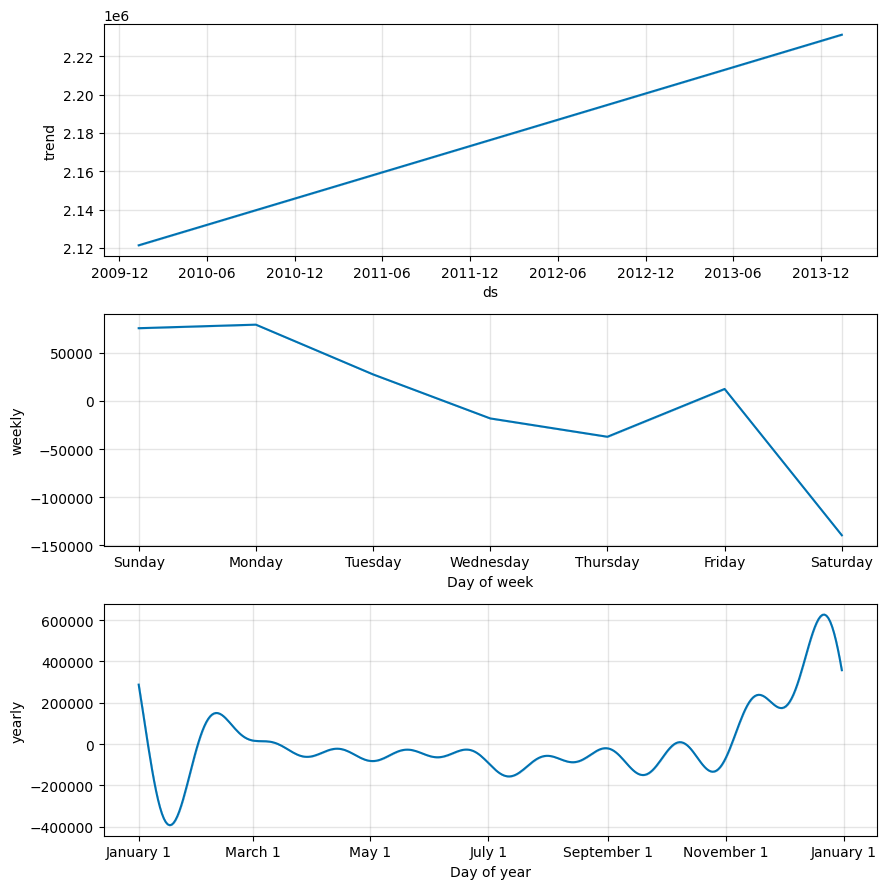

In [73]:
fig2 = con_model4.plot_components(forecast)

  0%|          | 0/66 [00:00<?, ?it/s]

17:37:54 - cmdstanpy - INFO - Chain [1] start processing
17:37:54 - cmdstanpy - INFO - Chain [1] done processing
17:37:54 - cmdstanpy - INFO - Chain [1] start processing
17:37:54 - cmdstanpy - INFO - Chain [1] done processing
17:37:54 - cmdstanpy - INFO - Chain [1] start processing
17:37:54 - cmdstanpy - INFO - Chain [1] done processing
17:37:54 - cmdstanpy - INFO - Chain [1] start processing
17:37:54 - cmdstanpy - INFO - Chain [1] done processing
17:37:54 - cmdstanpy - INFO - Chain [1] start processing
17:37:54 - cmdstanpy - INFO - Chain [1] done processing
17:37:54 - cmdstanpy - INFO - Chain [1] start processing
17:37:54 - cmdstanpy - INFO - Chain [1] done processing
17:37:55 - cmdstanpy - INFO - Chain [1] start processing
17:37:55 - cmdstanpy - INFO - Chain [1] done processing
17:37:55 - cmdstanpy - INFO - Chain [1] start processing
17:37:55 - cmdstanpy - INFO - Chain [1] done processing
17:37:55 - cmdstanpy - INFO - Chain [1] start processing
17:37:55 - cmdstanpy - INFO - Chain [1]

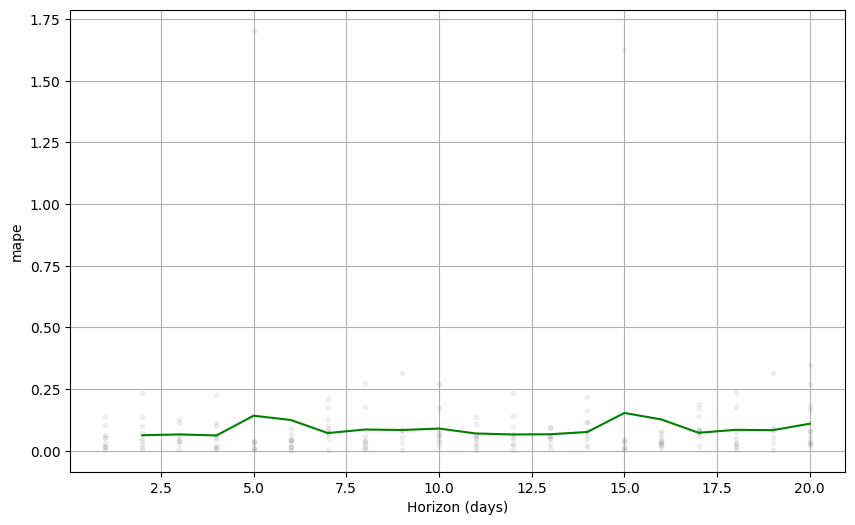

In [127]:
df_cv4 = cross_validation(con_model4, horizon = '20 days')
df_p4 = performance_metrics(df_cv4)
fig = plot_cross_validation_metric(df_cv4, metric='mape', color = 'green')

In [128]:
df_p4.head(2)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,5.959619e+10,244123.316208,152939.321463,0.062880,0.045084,0.063040,0.944444
1,3 days,5.930769e+10,243531.702111,156330.572504,0.066135,0.043468,0.065905,0.944444


# TIME SERIES ANALYSIS FOR STORE 14

In [74]:
 # EXTRACTING STORE 14
store14 = df1[df1.Store == 14]

# Grouping data date wise and summing up sales
store14sales = pd.DataFrame(store14.groupby('Date')['Weekly_Sales'].sum())

# CONVERTING THE INDEX TO DATETIME FORMAT

store14sales.index = pd.to_datetime(store14sales.index)


/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_58488/1596938087.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  store14sales.index = pd.to_datetime(store14sales.index)


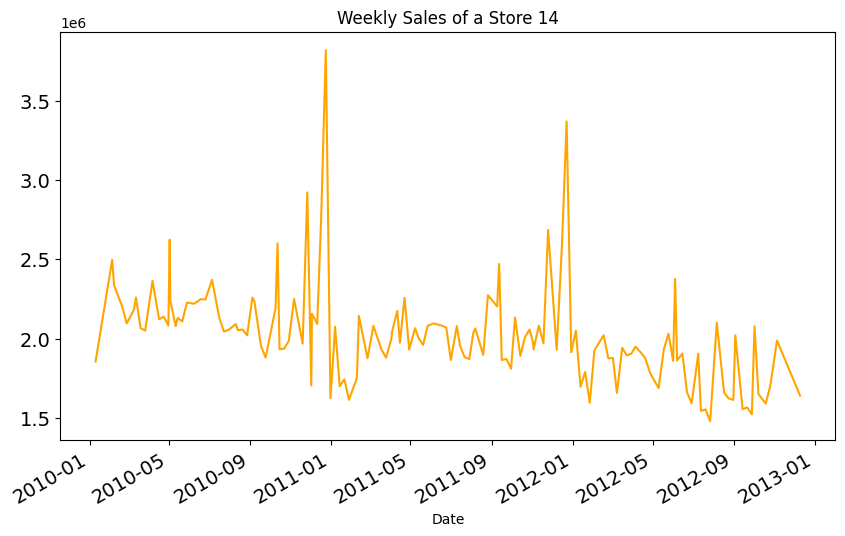

In [75]:
# Plotting weekly sales to see the trend and sesonality

store14sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store 14', fontsize=14, color = 'orange')
plt.show()

In [76]:
# RESETTING INDEX TO RENAME COLUMNS

store14sales.reset_index(inplace = True)


In [77]:
# RENAMING COLUMNS FOR FBPROPHET
store14sales = store14sales.rename(columns = {'Date': 'ds', 'Weekly_Sales':'y'})

In [78]:
# CREATING OBJECT FOR THE MODEL

con_model14=Prophet(interval_width=0.95)

In [79]:
# Training of Model (fiting thr data to the model)
con_model14.fit(store14sales)

13:05:38 - cmdstanpy - INFO - Chain [1] start processing
13:05:39 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
# CREATING FUTURE DATAFRAME FOR FORECASTING

future14=con_model14.make_future_dataframe(periods=400)

In [81]:
future14

,ds
0,2010-01-10
1,2010-02-04
2,2010-02-07
3,2010-02-19
4,2010-02-26
...,...
538,2014-01-10
539,2014-01-11
540,2014-01-12
541,2014-01-13


In [82]:
forecast14=con_model14.predict(future)
forecast14[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
536,2014-01-08,8.290680e+05,412444.327607,1.277676e+06
537,2014-01-09,9.550886e+05,532164.738458,1.392022e+06
538,2014-01-10,9.510233e+05,556410.761466,1.387401e+06
539,2014-01-11,8.520189e+05,423870.380632,1.300986e+06
540,2014-01-12,9.789915e+05,559857.074494,1.427248e+06
541,2014-01-13,1.028196e+06,595211.112715,1.495532e+06
542,2014-01-14,8.870330e+05,462144.330242,1.299076e+06


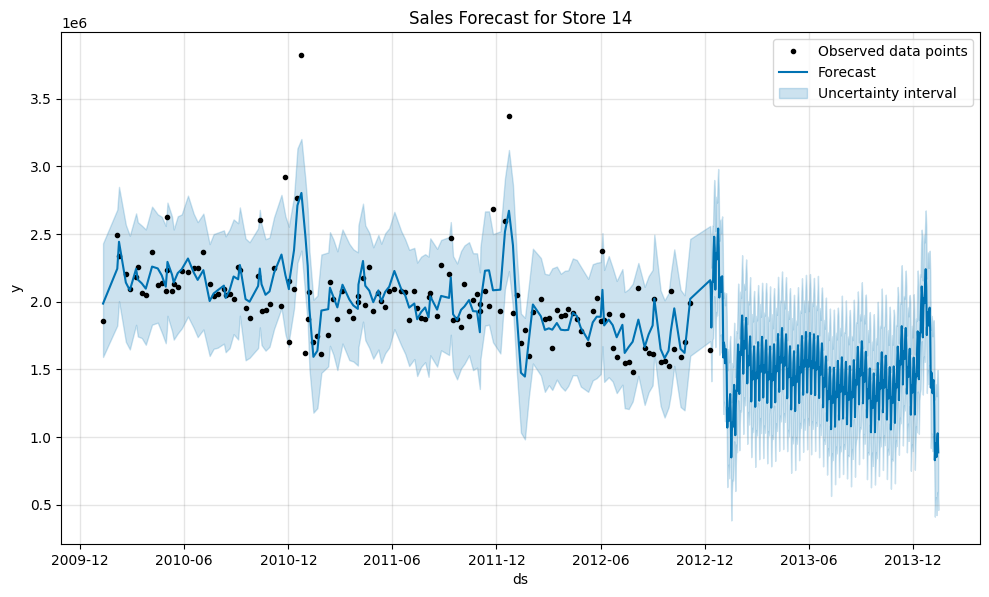

In [83]:
# PLOTTING DATA TO VISUALISE THE FORECAST

confirmed_plot14=con_model14.plot(forecast14)
plt.title('Sales Forecast for Store 14')
plt.legend()

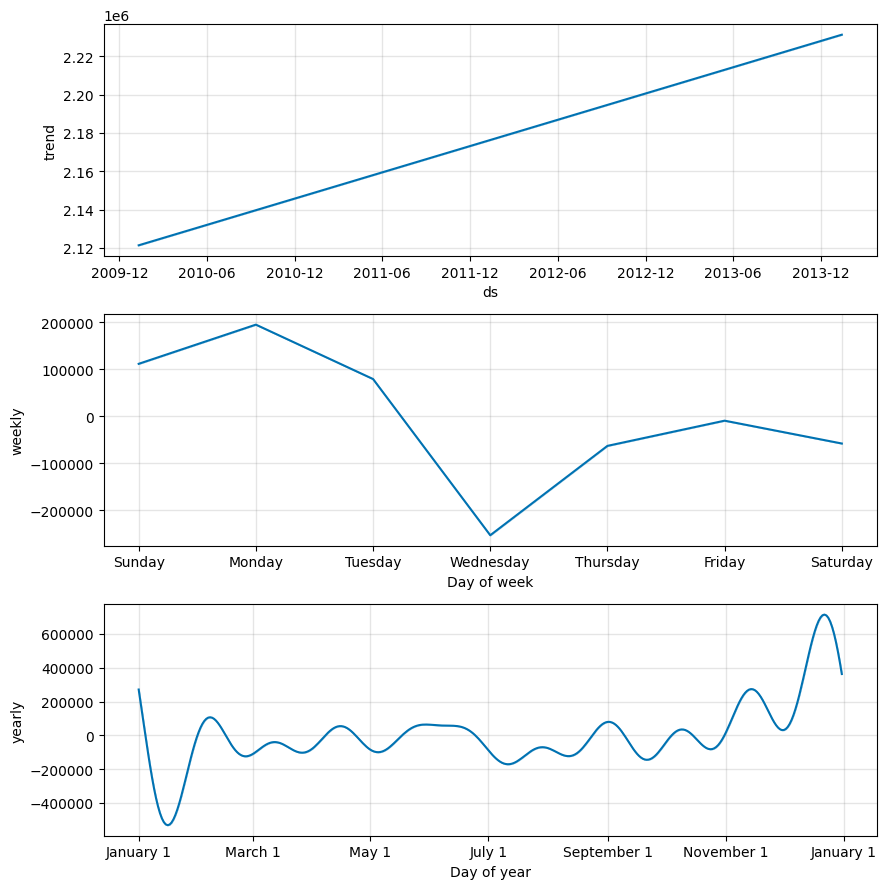

In [90]:
fig2 = con_model14.plot_components(forecast)
plt.show()

  0%|          | 0/66 [00:00<?, ?it/s]

17:37:00 - cmdstanpy - INFO - Chain [1] start processing
17:37:00 - cmdstanpy - INFO - Chain [1] done processing
17:37:00 - cmdstanpy - INFO - Chain [1] start processing
17:37:00 - cmdstanpy - INFO - Chain [1] done processing
17:37:00 - cmdstanpy - INFO - Chain [1] start processing
17:37:00 - cmdstanpy - INFO - Chain [1] done processing
17:37:00 - cmdstanpy - INFO - Chain [1] start processing
17:37:00 - cmdstanpy - INFO - Chain [1] done processing
17:37:01 - cmdstanpy - INFO - Chain [1] start processing
17:37:01 - cmdstanpy - INFO - Chain [1] done processing
17:37:01 - cmdstanpy - INFO - Chain [1] start processing
17:37:01 - cmdstanpy - INFO - Chain [1] done processing
17:37:01 - cmdstanpy - INFO - Chain [1] start processing
17:37:01 - cmdstanpy - INFO - Chain [1] done processing
17:37:01 - cmdstanpy - INFO - Chain [1] start processing
17:37:01 - cmdstanpy - INFO - Chain [1] done processing
17:37:01 - cmdstanpy - INFO - Chain [1] start processing
17:37:01 - cmdstanpy - INFO - Chain [1]

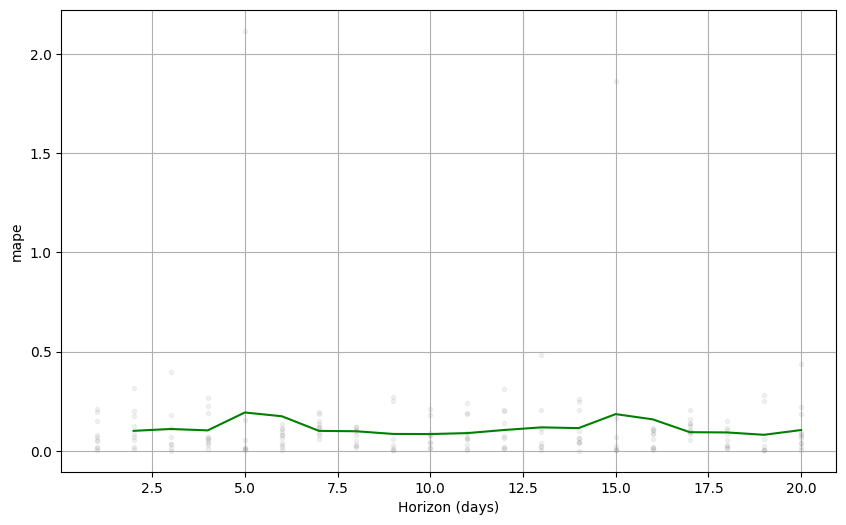

In [125]:
df_cv14 = cross_validation(con_model14, horizon = '20 days')
df_p14 = performance_metrics(df_cv14)
df_p14.head(2)
fig = plot_cross_validation_metric(df_cv14, metric='mape', color = 'green')

In [126]:
df_p14.head(2)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,7.161168e+10,267603.585299,196215.760825,0.100299,0.074572,0.099138,0.838889
1,3 days,8.475831e+10,291132.796869,207575.317756,0.109613,0.067430,0.104861,0.827778


# TIME SERIES ANALYSIS FOR STORE 2

/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_58488/957154312.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  store2sales.index = pd.to_datetime(store2sales.index)


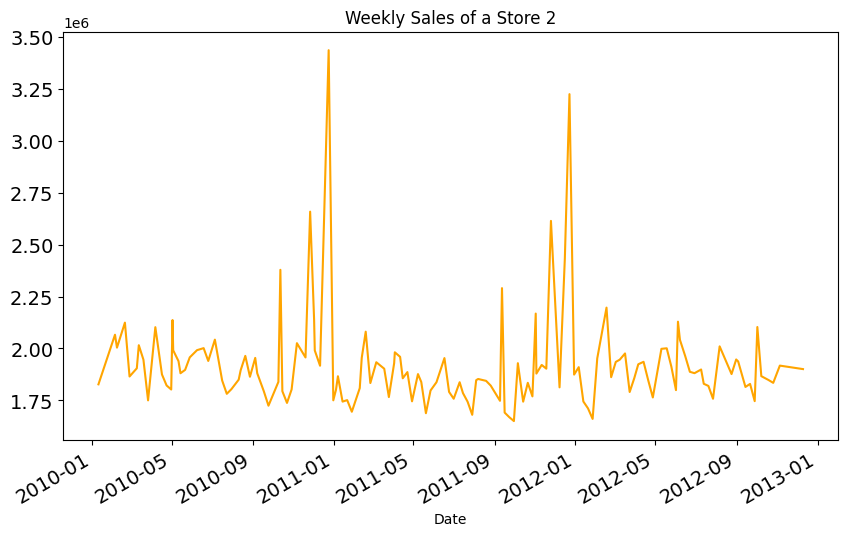

13:05:40 - cmdstanpy - INFO - Chain [1] start processing
13:05:40 - cmdstanpy - INFO - Chain [1] done processing


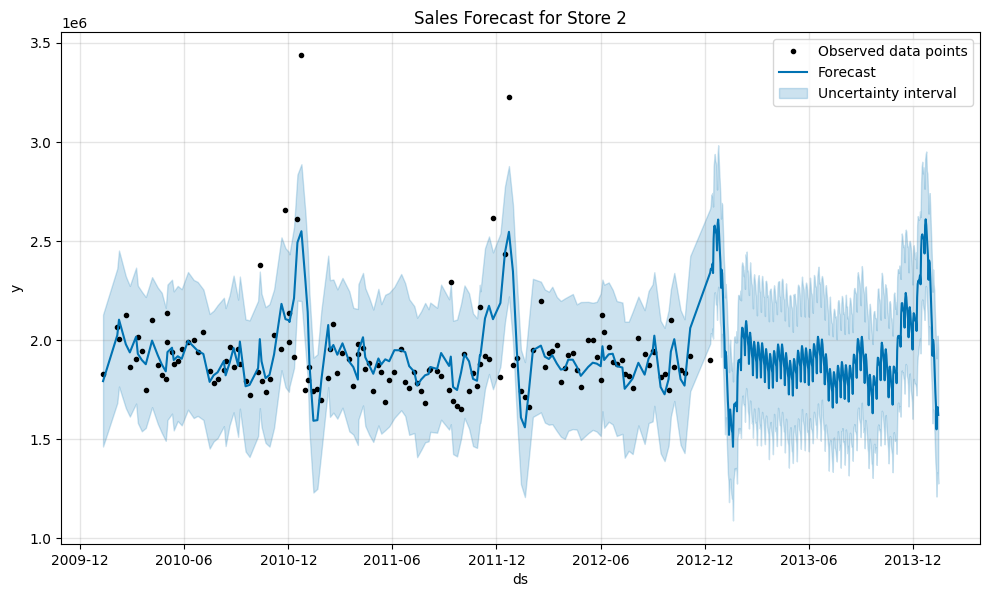

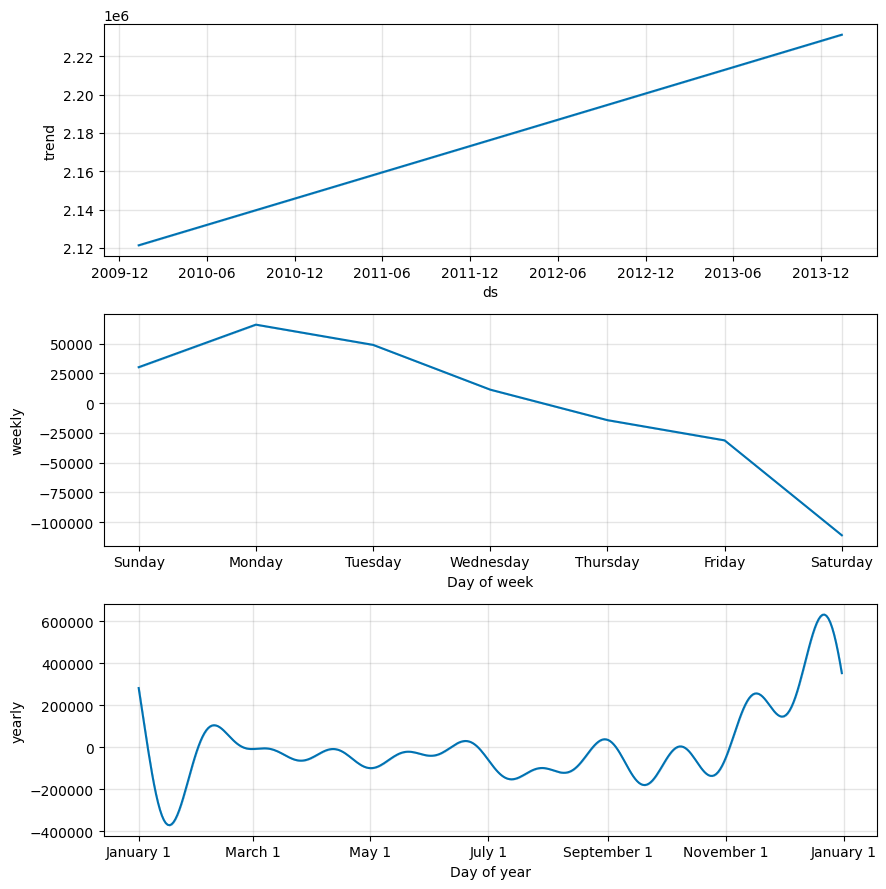

In [85]:


# EXTRACTING STORE 2
store2 = df1[df1.Store == 2]

# Grouping data date wise and summing up sales
store2sales = pd.DataFrame(store2.groupby('Date')['Weekly_Sales'].sum())

# CONVERTING THE INDEX TO DATETIME FORMAT

store2sales.index = pd.to_datetime(store2sales.index)


# Plotting weekly sales to see the trend and sesonality

store2sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store 2', fontsize=14, color = 'orange')
plt.show()

# RESETTING INDEX TO RENAME COLUMNS

store2sales.reset_index(inplace = True)


# RENAMING COLUMNS FOR FBPROPHET
store2sales = store2sales.rename(columns = {'Date': 'ds', 'Weekly_Sales':'y'})

# CREATING OBJECT FOR THE MODEL

con_model2=Prophet(interval_width=0.95)

# Training of Model (fiting thr data to the model)
con_model2.fit(store2sales)

# CREATING FUTURE DATAFRAME FOR FORECASTING

future2=con_model2.make_future_dataframe(periods=400)

future2

forecast2=con_model2.predict(future)
forecast2[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

# PLOTTING DATA TO VISUALISE THE FORECAST

confirmed_plot2=con_model2.plot(forecast2)
plt.title('Sales Forecast for Store 2')
plt.legend()

fig2 = con_model2.plot_components(forecast)

  0%|          | 0/66 [00:00<?, ?it/s]

17:36:15 - cmdstanpy - INFO - Chain [1] start processing
17:36:15 - cmdstanpy - INFO - Chain [1] done processing
17:36:16 - cmdstanpy - INFO - Chain [1] start processing
17:36:16 - cmdstanpy - INFO - Chain [1] done processing
17:36:16 - cmdstanpy - INFO - Chain [1] start processing
17:36:16 - cmdstanpy - INFO - Chain [1] done processing
17:36:16 - cmdstanpy - INFO - Chain [1] start processing
17:36:16 - cmdstanpy - INFO - Chain [1] done processing
17:36:16 - cmdstanpy - INFO - Chain [1] start processing
17:36:16 - cmdstanpy - INFO - Chain [1] done processing
17:36:16 - cmdstanpy - INFO - Chain [1] start processing
17:36:16 - cmdstanpy - INFO - Chain [1] done processing
17:36:16 - cmdstanpy - INFO - Chain [1] start processing
17:36:16 - cmdstanpy - INFO - Chain [1] done processing
17:36:16 - cmdstanpy - INFO - Chain [1] start processing
17:36:16 - cmdstanpy - INFO - Chain [1] done processing
17:36:16 - cmdstanpy - INFO - Chain [1] start processing
17:36:16 - cmdstanpy - INFO - Chain [1]

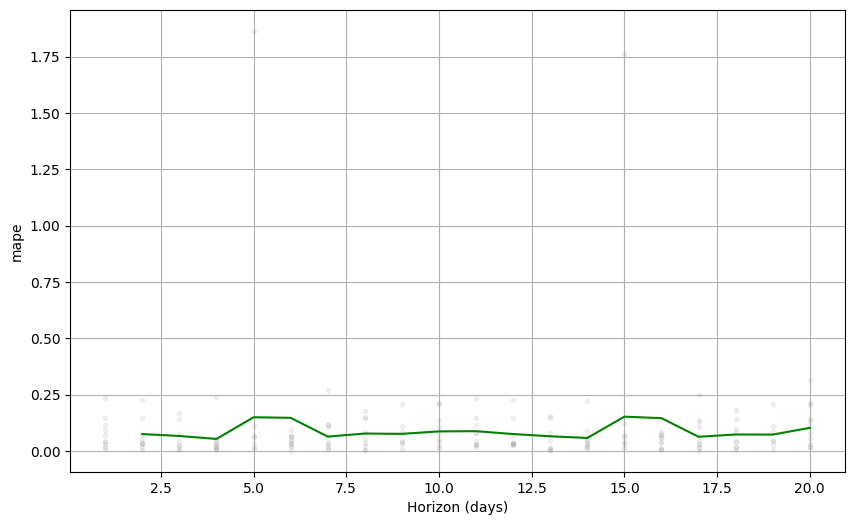

In [123]:
df_cv2 = cross_validation(con_model2, horizon = '20 days')
df_p2 = performance_metrics(df_cv2)
df_p2.head(2)
fig = plot_cross_validation_metric(df_cv2, metric='mape', color = 'green')

In [124]:
df_p2.head(2)


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,5.824219e+10,241334.185230,159026.248492,0.074678,0.042034,0.077012,0.894444
1,3 days,4.802597e+10,219148.292908,137524.949791,0.066209,0.039379,0.066965,0.938889


# TIME SERIES ANALYSIS FOR STORE 13

/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_58488/1103553980.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  store13sales.index = pd.to_datetime(store13sales.index)


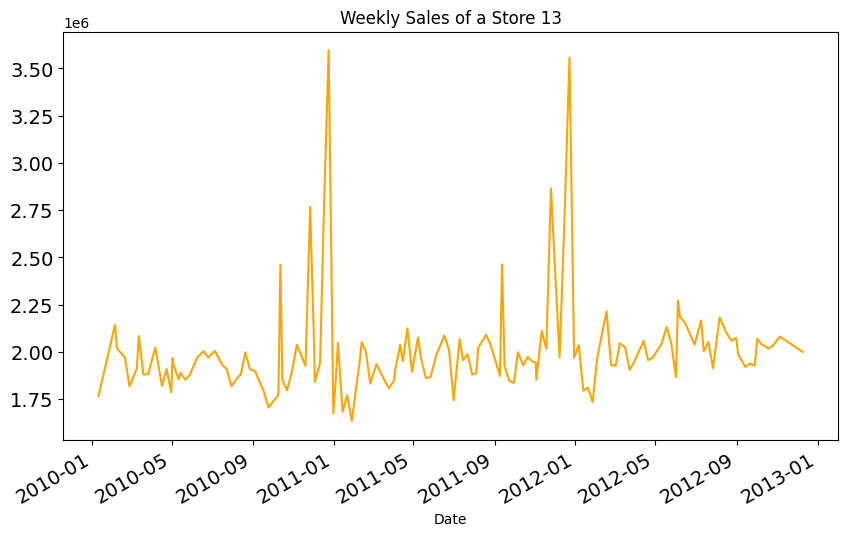

13:05:40 - cmdstanpy - INFO - Chain [1] start processing
13:05:41 - cmdstanpy - INFO - Chain [1] done processing


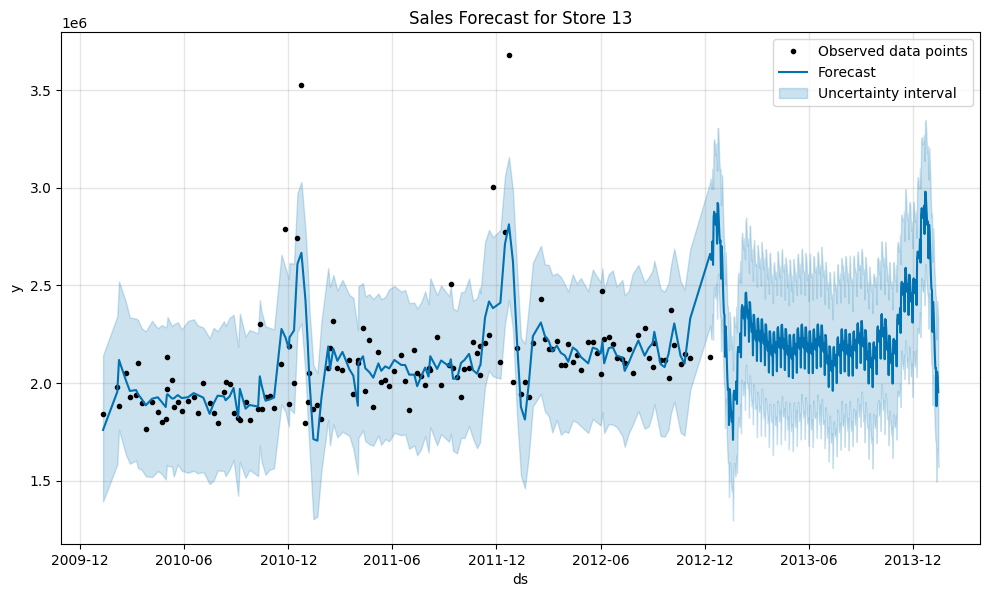

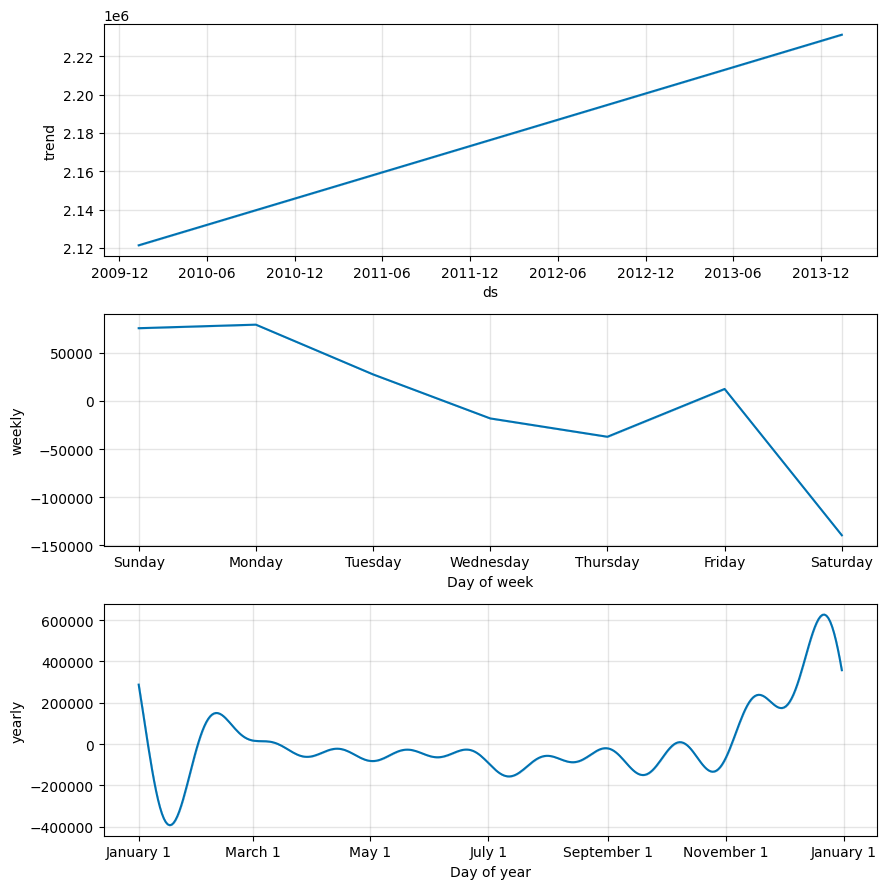

In [86]:


# EXTRACTING STORE 13
store13 = df1[df1.Store == 13]

# Grouping data date wise and summing up sales
store13sales = pd.DataFrame(store13.groupby('Date')['Weekly_Sales'].sum())

# CONVERTING THE INDEX TO DATETIME FORMAT

store13sales.index = pd.to_datetime(store13sales.index)


# Plotting weekly sales to see the trend and sesonality

store13sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store 13', fontsize=14, color = 'orange')
plt.show()

# RESETTING INDEX TO RENAME COLUMNS

store13sales.reset_index(inplace = True)


# RENAMING COLUMNS FOR FBPROPHET
store13sales = store13sales.rename(columns = {'Date': 'ds', 'Weekly_Sales':'y'})

# CREATING OBJECT FOR THE MODEL

con_model13=Prophet(interval_width=0.95)

# Training of Model (fiting thr data to the model)
con_model13.fit(store4sales)

# CREATING FUTURE DATAFRAME FOR FORECASTING

future13=con_model13.make_future_dataframe(periods=400)

future13

forecast13=con_model13.predict(future)
forecast13[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

# PLOTTING DATA TO VISUALISE THE FORECAST

confirmed_plot13=con_model13.plot(forecast13)
plt.title('Sales Forecast for Store 13')
plt.legend()

fig2 = con_model13.plot_components(forecast)

In [100]:
from prophet.diagnostics import cross_validation

In [117]:
df_cv = cross_validation(con_model13, horizon = '20 days')

  0%|          | 0/66 [00:00<?, ?it/s]

17:34:02 - cmdstanpy - INFO - Chain [1] start processing
17:34:02 - cmdstanpy - INFO - Chain [1] done processing
17:34:02 - cmdstanpy - INFO - Chain [1] start processing
17:34:02 - cmdstanpy - INFO - Chain [1] done processing
17:34:02 - cmdstanpy - INFO - Chain [1] start processing
17:34:03 - cmdstanpy - INFO - Chain [1] done processing
17:34:03 - cmdstanpy - INFO - Chain [1] start processing
17:34:03 - cmdstanpy - INFO - Chain [1] done processing
17:34:03 - cmdstanpy - INFO - Chain [1] start processing
17:34:03 - cmdstanpy - INFO - Chain [1] done processing
17:34:03 - cmdstanpy - INFO - Chain [1] start processing
17:34:03 - cmdstanpy - INFO - Chain [1] done processing
17:34:03 - cmdstanpy - INFO - Chain [1] start processing
17:34:03 - cmdstanpy - INFO - Chain [1] done processing
17:34:03 - cmdstanpy - INFO - Chain [1] start processing
17:34:03 - cmdstanpy - INFO - Chain [1] done processing
17:34:03 - cmdstanpy - INFO - Chain [1] start processing
17:34:03 - cmdstanpy - INFO - Chain [1]

In [118]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head(2)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,5.959619e+10,244123.316208,152939.321463,0.062880,0.045084,0.063040,0.944444
1,3 days,5.930769e+10,243531.702111,156330.572504,0.066135,0.043468,0.065905,0.944444


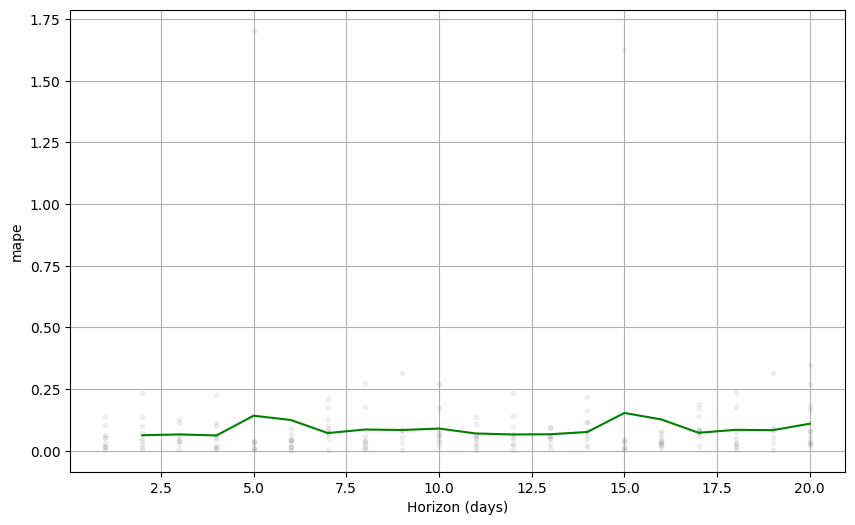

In [119]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mape', color = 'green')